In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml
titanic_data = fetch_openml("titanic", version=1, as_frame=True)

In [5]:
df = titanic_data['data']

In [9]:
df['survived'] = titanic_data['target']

In [11]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='survived', ylabel='count'>

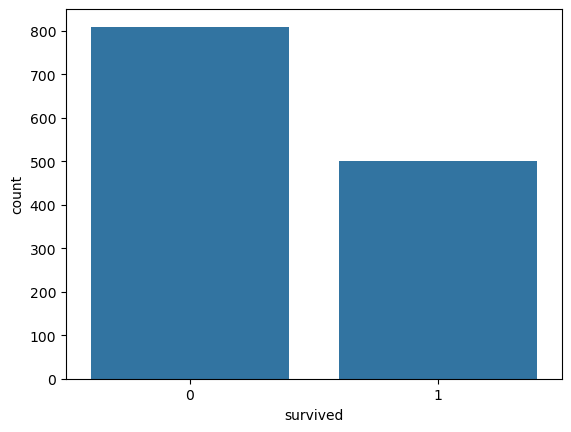

In [13]:
sns.countplot(x='survived', data=df)

<Axes: xlabel='survived', ylabel='count'>

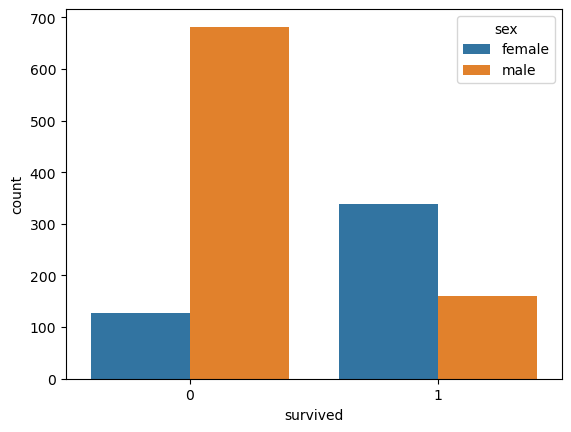

In [15]:
sns.countplot(x='survived', hue='sex', data=df)

<Axes: xlabel='survived', ylabel='count'>

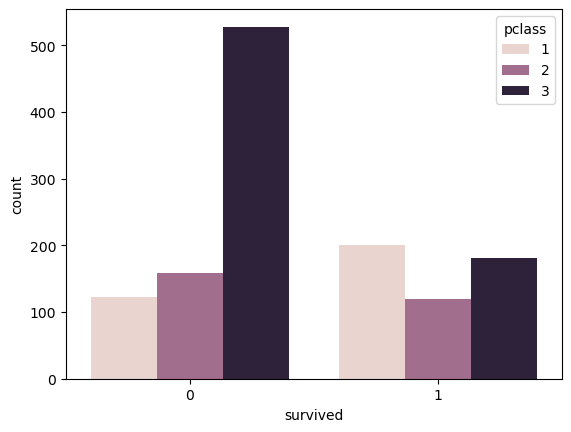

In [17]:
sns.countplot(x='survived', hue='pclass', data=df)


<Axes: ylabel='Frequency'>

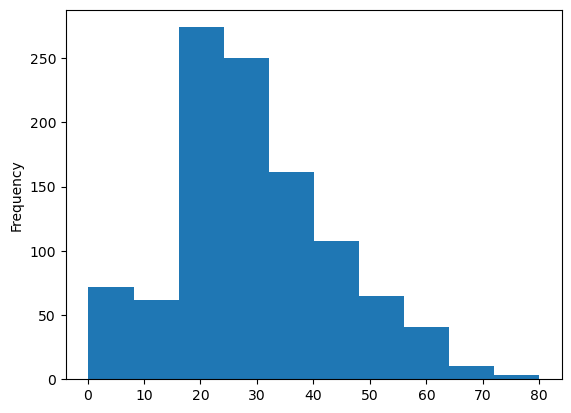

In [19]:
df['age'].plot.hist()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [23]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'Missing values in percentage'}, ylabel='Percentage'>

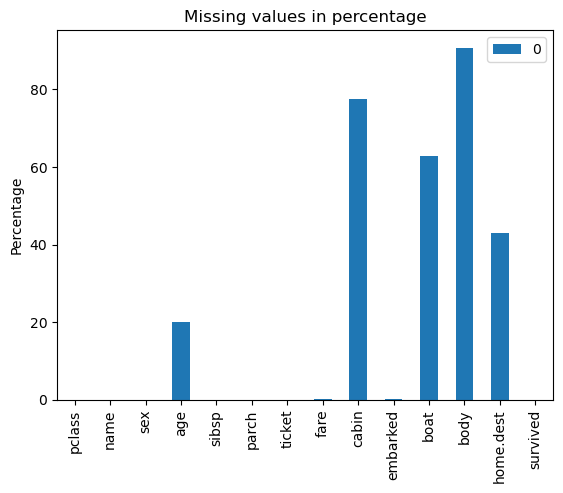

In [27]:
missing_values = pd.DataFrame(df.isnull().sum()/len(df)*100)
missing_values.plot(kind='bar', title="Missing values in percentage", ylabel='Percentage')

In [29]:
df['family'] = df['sibsp'] + df['parch']

In [31]:
df.loc[df['family'] > 0, 'travelled_along'] = 0
df.loc[df['family'] == 0, 'travelled_along'] = 1

In [33]:
df['family'].head()

0    0
1    3
2    3
3    3
4    3
Name: family, dtype: int64

In [37]:
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

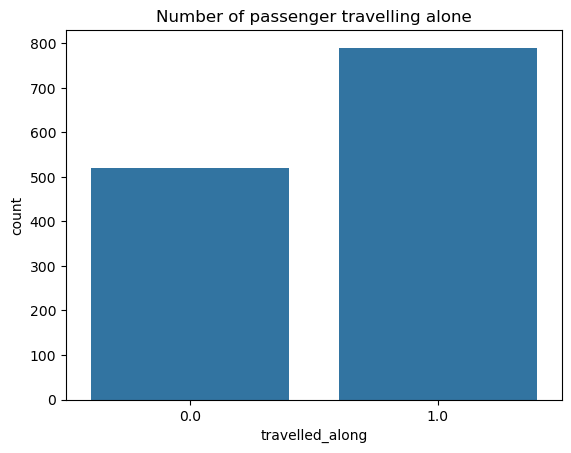

In [41]:
sns.countplot(x='travelled_along', data = df)
plt.title('Number of passenger travelling alone')
plt.show()

In [43]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_along
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [45]:
df.drop(['name', 'ticket', 'home.dest'], axis=1, inplace=True)

In [47]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,travelled_along
0,1,female,29.0000,211.3375,B5,S,2,NaN,1,0,1.0
1,1,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0


In [49]:
df.drop(['cabin', 'body', "boat"], axis=1, inplace=True)

In [51]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_along
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [53]:
df.isnull().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_along      0
dtype: int64

In [63]:
sex = pd.get_dummies(df['sex'], drop_first= True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [65]:
df['sex'] = sex

In [67]:
df.isnull().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_along      0
dtype: int64

In [69]:
from sklearn.impute import SimpleImputer

In [71]:
imp_mean = SimpleImputer(strategy='mean')

In [73]:
df['age'] = imp_mean.fit_transform(df[['age']])
df['fare'] = imp_mean.fit_transform(df[['fare']])

In [75]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           2
survived           0
family             0
travelled_along    0
dtype: int64

In [86]:
imp_most_freq = SimpleImputer(strategy='most_frequent')
df['embarked'] = imp_most_freq.fit_transform(df[['embarked']]).ravel()

In [88]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
survived           0
family             0
travelled_along    0
dtype: int64

In [90]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_along
0,1,False,29.0000,211.3375,S,1,0,1.0
1,1,True,0.9167,151.5500,S,1,3,0.0
2,1,False,2.0000,151.5500,S,0,3,0.0
3,1,True,30.0000,151.5500,S,0,3,0.0
4,1,False,25.0000,151.5500,S,0,3,0.0


In [94]:
embark = pd.get_dummies(df['embarked'], drop_first=True)
print(embark)

          Q      S
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
...     ...    ...
1304  False  False
1305  False  False
1306  False  False
1307  False  False
1308  False   True

[1309 rows x 2 columns]


In [100]:
df.drop(['embarked'], axis=1, inplace = True)

In [102]:
df = pd.concat([df, embark], axis=1)

In [104]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_along,Q,S
0,1,False,29.0000,211.3375,1,0,1.0,False,True
1,1,True,0.9167,151.5500,1,3,0.0,False,True
2,1,False,2.0000,151.5500,0,3,0.0,False,True
3,1,True,30.0000,151.5500,0,3,0.0,False,True
4,1,False,25.0000,151.5500,0,3,0.0,False,True


In [106]:
x = df.drop(['survived'], axis = 1)
x.head()

,pclass,sex,age,fare,family,travelled_along,Q,S
0,1,False,29.0000,211.3375,0,1.0,False,True
1,1,True,0.9167,151.5500,3,0.0,False,True
2,1,False,2.0000,151.5500,3,0.0,False,True
3,1,True,30.0000,151.5500,3,0.0,False,True
4,1,False,25.0000,151.5500,3,0.0,False,True


In [108]:
y = df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [112]:
print(x_train.shape, y_train.shape)

(916, 8) (916,)


In [114]:
print(x_test.shape, y_test.shape)

(393, 8) (393,)


In [116]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
pred = mod.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7989821882951654

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[204,  32],
       [ 47, 110]])